In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import pathlib
import cv2

#### Show images

In [17]:
data_dir = pathlib.Path("/kaggle/input/pollen-data/Pollen_dataset")

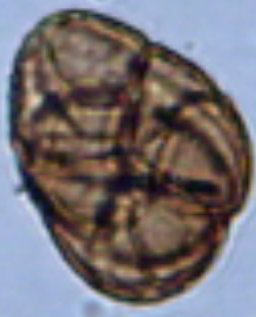

In [18]:
ana = list(data_dir.glob('anadenanthera/*'))
PIL.Image.open(str(ana[0]))

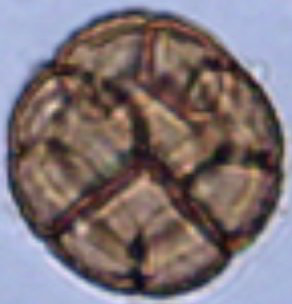

In [5]:
PIL.Image.open(str(ana[1]))

In [20]:
import tensorflow as tf
from tensorflow import keras
import glob 
from skimage import io 
import skimage
import random 
import matplotlib.image as mpimg

In [8]:
datadir = "/kaggle/input/pollen-data/Pollen_dataset"
categories = ['Croton', 'arrabidaea', 'Protium', 'Faramea', 'Cecropia', 'sp3', 
              'Matayba', 'anadenanthera', 'Chromolaena', 'Senegalia', 'Eucaliptos', 
              'Myrcia', 'Syagrus', 'mabea', 'Serjania', 'Schinus', 'Combretum', 'arecaceae']

In [22]:
pollen_path = os.path.join(datadir, categories[1], '*')
pollen_path = glob.glob(pollen_path)

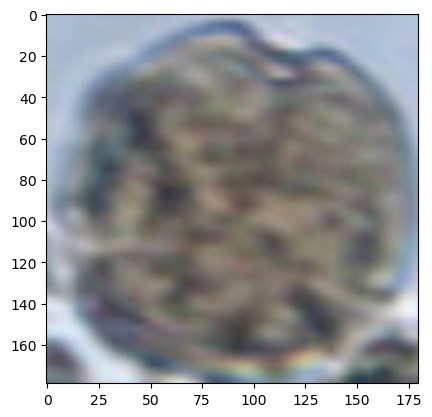

In [23]:
# accessing an image file from the dataset classes
image = io.imread(pollen_path[4])  

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

Text(0.5, 0.98, 'Original & RGB image channels')

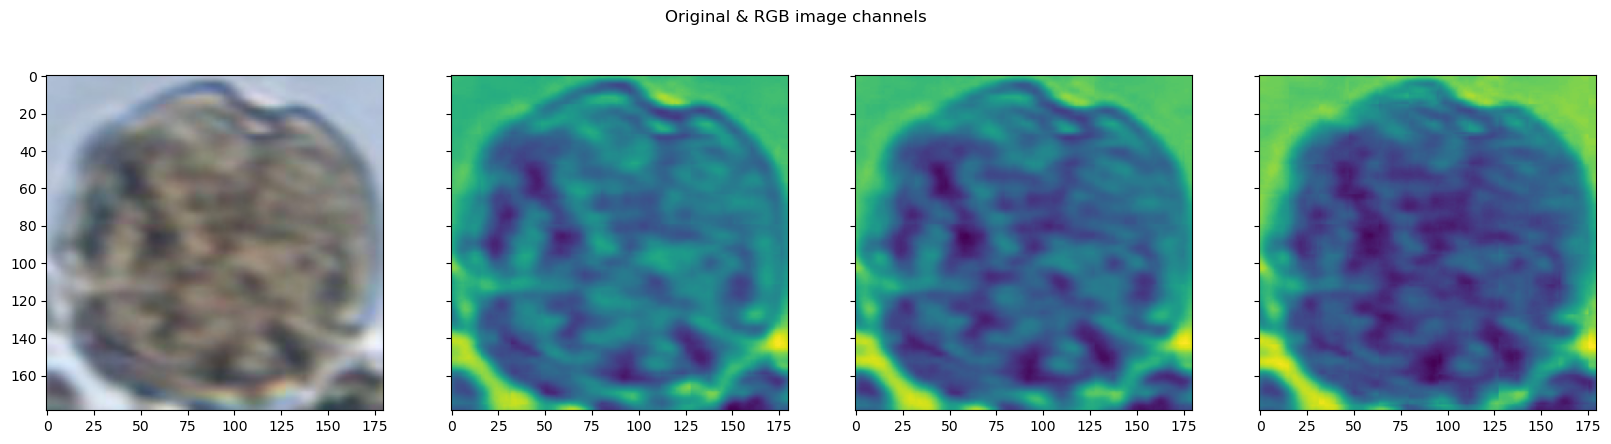

In [24]:
# plotting the original image and the RGB channels  

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

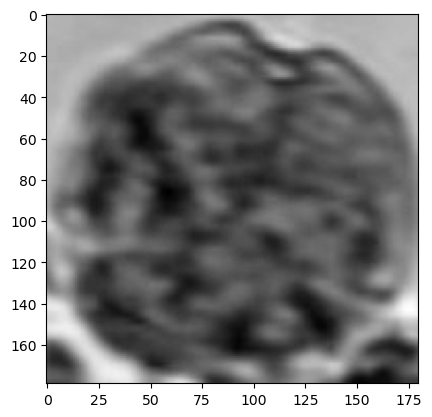

In [25]:
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

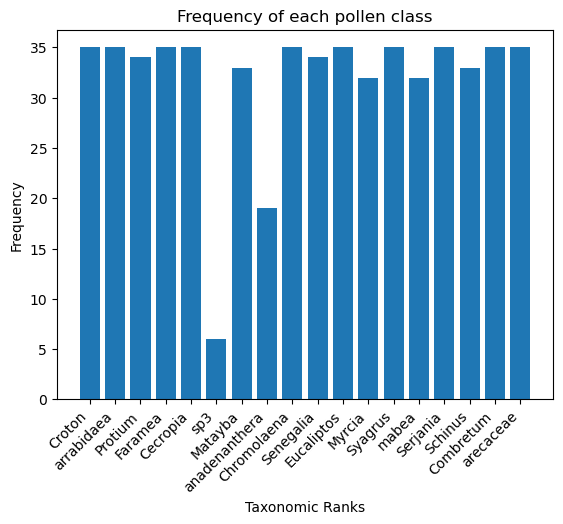

In [9]:
# plot to see frequency of each class
labels = os.listdir(datadir)

counts = []
for label in labels:
    n_class = os.path.join(datadir,label)
    count = len(os.listdir(n_class))
    counts.append(count)

plt.bar(labels, counts)
plt.title('Frequency of each pollen class')
plt.xlabel('Taxonomic Ranks')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
num_items = list(zip(labels,counts))
num_items

[('Croton', 35),
 ('arrabidaea', 35),
 ('Protium', 34),
 ('Faramea', 35),
 ('Cecropia', 35),
 ('sp3', 6),
 ('Matayba', 33),
 ('anadenanthera', 19),
 ('Chromolaena', 35),
 ('Senegalia', 34),
 ('Eucaliptos', 35),
 ('Myrcia', 32),
 ('Syagrus', 35),
 ('mabea', 32),
 ('Serjania', 35),
 ('Schinus', 33),
 ('Combretum', 35),
 ('arecaceae', 35)]

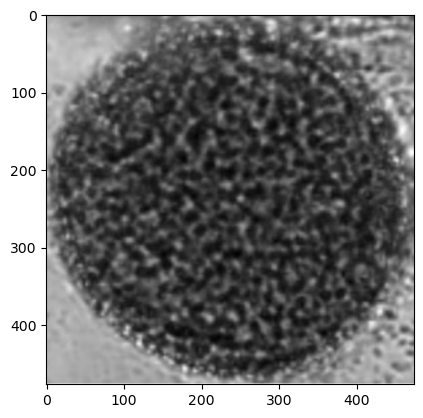

In [28]:
# iterate all the images, and convert all into greyscale image
for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [29]:
print(img_array)
print(img_array.shape)

[[210 169 168 ... 114 109 109]
 [211 170 168 ... 109 104 104]
 [212 171 169 ...  99  96  96]
 ...
 [205 160 155 ... 164 163 163]
 [200 161 159 ... 166 165 165]
 [234 203 205 ... 209 209 209]]
(477, 474)


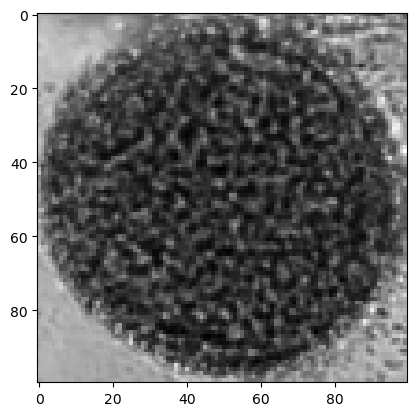

In [30]:
# normalize the shape, resize to fit the model
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [31]:
# create training data sets
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [32]:
print(len(training_data))

573


In [33]:
# shuffle the data, balance the data
import random

random.shuffle(training_data)

In [34]:
# check if the images were shuffle
for sample in training_data[:10]:
    print(sample[1])

10
9
16
15
9
1
2
17
12
2


18 classes in total, 0 is the first class, 17 is the last

In [35]:
# feature set
X = []
# label set
y = []

In [36]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # grayscale = 1, color = 3
y = np.array(y)

In [37]:
# save our data so no need to run it every time
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [38]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [39]:
X[1]

array([[[180],
        [162],
        [157],
        ...,
        [148],
        [151],
        [152]],

       [[175],
        [151],
        [141],
        ...,
        [149],
        [150],
        [151]],

       [[172],
        [142],
        [126],
        ...,
        [149],
        [151],
        [150]],

       ...,

       [[163],
        [153],
        [155],
        ...,
        [154],
        [150],
        [149]],

       [[166],
        [155],
        [157],
        ...,
        [151],
        [150],
        [151]],

       [[183],
        [174],
        [174],
        ...,
        [169],
        [169],
        [169]]], dtype=uint8)

In [40]:
X.shape

(573, 100, 100, 1)

In [41]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb")) 

In [42]:
# normalize the data, 0-255 for pixel values
X = X/255.0

### Base model

In [43]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [44]:
# building models
model = Sequential()

# layer 1
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))   # activition layer
model.add(MaxPooling2D(pool_size=(2,2)))   # pooling

# layer 2, 2x64 convolutional network
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# layer 3
model.add(Flatten())  # flatten the data
model.add(Dense(64)) # add a dense layer

# output layer
model.add(Dense(1))
model.add(Activation("sigmoid"))


In [45]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=5, validation_split=0.2) 

Epoch 1/5
15/15 [==============================] - 10s 45ms/step - loss: 0.0000e+00 - accuracy: 0.0590 - val_loss: 0.0000e+00 - val_accuracy: 0.0609
Epoch 2/5
15/15 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0611 - val_loss: 0.0000e+00 - val_accuracy: 0.0609
Epoch 3/5
15/15 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0611 - val_loss: 0.0000e+00 - val_accuracy: 0.0609
Epoch 4/5
15/15 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0611 - val_loss: 0.0000e+00 - val_accuracy: 0.0609
Epoch 5/5
15/15 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0611 - val_loss: 0.0000e+00 - val_accuracy: 0.0609


In [48]:
model.fit(X, y, batch_size=20, epochs=10, validation_split=0.2)

Epoch 1/10
23/23 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0611 - val_loss: 0.0000e+00 - val_accuracy: 0.0609
Epoch 2/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.0611 - val_loss: 0.0000e+00 - val_accuracy: 0.0609
Epoch 3/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0611 - val_loss: 0.0000e+00 - val_accuracy: 0.0609
Epoch 4/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.0611 - val_loss: 0.0000e+00 - val_accuracy: 0.0609
Epoch 5/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0611 - val_loss: 0.0000e+00 - val_accuracy: 0.0609
Epoch 6/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0611 - val_loss: 0.0000e+00 - val_accuracy: 0.0609
Epoch 7/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0611 - v

## Use VGG16 cnn model

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

In [50]:
model = VGG16()

553467096/553467096 [==============================] - 4s 0us/step


In [51]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [127]:
# image augumentation
train_datagen = ImageDataGenerator(zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15)

test_datagen = ImageDataGenerator(zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15)

In [128]:
train_generator = train_datagen.flow_from_directory(data_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode="categorical" )

test_generator = test_datagen.flow_from_directory(data_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  shuffle=False,
                                                  class_mode="categorical")

Found 573 images belonging to 18 classes.
Found 573 images belonging to 18 classes.


In [129]:
base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(18, activation='softmax')(x)

In [130]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [131]:
model.fit(train_generator, epochs=3, validation_data=test_generator)

Epoch 1/3
18/18 [==============================] - 17s 908ms/step - loss: 1.4174 - accuracy: 0.8220 - val_loss: 1.9781 - val_accuracy: 0.8028
Epoch 2/3
18/18 [==============================] - 15s 873ms/step - loss: 1.4435 - accuracy: 0.8307 - val_loss: 1.5624 - val_accuracy: 0.8551
Epoch 3/3
18/18 [==============================] - 16s 907ms/step - loss: 1.0983 - accuracy: 0.8377 - val_loss: 0.6947 - val_accuracy: 0.8901


In [132]:
history=model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
18/18 [==============================] - 16s 903ms/step - loss: 1.1279 - accuracy: 0.8586 - val_loss: 0.8136 - val_accuracy: 0.8883
Epoch 2/10
18/18 [==============================] - 16s 905ms/step - loss: 0.9957 - accuracy: 0.8813 - val_loss: 0.7598 - val_accuracy: 0.8866
Epoch 3/10
18/18 [==============================] - 15s 873ms/step - loss: 0.8066 - accuracy: 0.8831 - val_loss: 0.5941 - val_accuracy: 0.8778
Epoch 4/10
18/18 [==============================] - 16s 905ms/step - loss: 0.5664 - accuracy: 0.8901 - val_loss: 0.8912 - val_accuracy: 0.8831
Epoch 5/10
18/18 [==============================] - 15s 872ms/step - loss: 0.7600 - accuracy: 0.8901 - val_loss: 0.8556 - val_accuracy: 0.8813
Epoch 6/10
18/18 [==============================] - 16s 899ms/step - loss: 0.6042 - accuracy: 0.8953 - val_loss: 0.6352 - val_accuracy: 0.8848
Epoch 7/10
18/18 [==============================] - 15s 873ms/step - loss: 0.6215 - accuracy: 0.8831 - val_loss: 0.4968 - val_accuracy: 0.9145

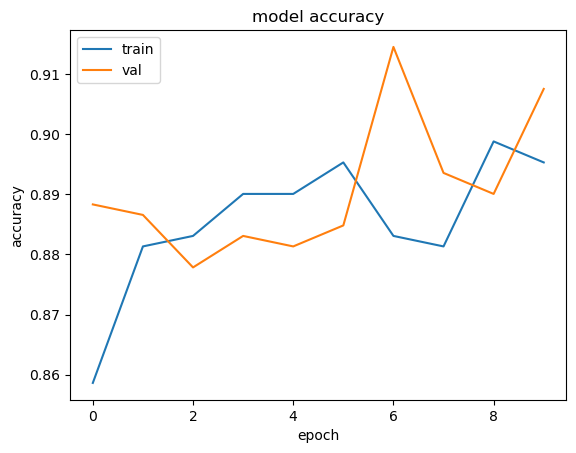

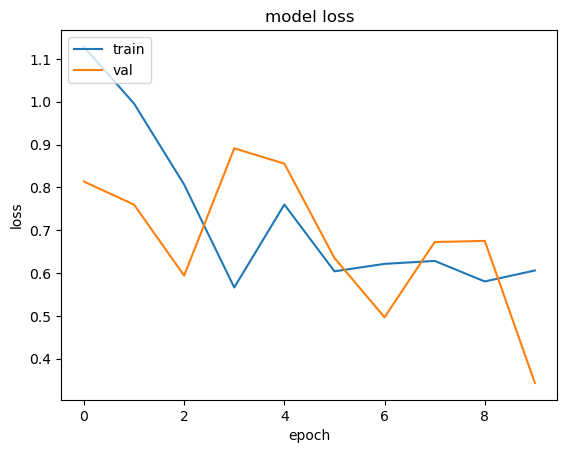

In [133]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [134]:
# playing with different image augumentation setting
train_datagen = ImageDataGenerator( rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

val_datagen = ImageDataGenerator( rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [135]:
# set up the image generators for the training and validation datasets
train_generator = train_datagen.flow_from_directory(data_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(data_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 573 images belonging to 18 classes.
Found 573 images belonging to 18 classes.


In [136]:
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
18/18 [==============================] - 16s 925ms/step - loss: 1.0651 - accuracy: 0.6405 - val_loss: 0.6553 - val_accuracy: 0.7871
Epoch 2/3
18/18 [==============================] - 15s 881ms/step - loss: 0.6225 - accuracy: 0.8028 - val_loss: 0.4979 - val_accuracy: 0.8586
Epoch 3/3
18/18 [==============================] - 16s 902ms/step - loss: 0.4837 - accuracy: 0.8220 - val_loss: 0.4030 - val_accuracy: 0.8743


In [137]:
history = model.fit(train_generator,epochs=10,validation_data=val_generator)

Epoch 1/10
18/18 [==============================] - 16s 892ms/step - loss: 0.4013 - accuracy: 0.8726 - val_loss: 0.3668 - val_accuracy: 0.8761
Epoch 2/10
18/18 [==============================] - 16s 906ms/step - loss: 0.3394 - accuracy: 0.8883 - val_loss: 0.3119 - val_accuracy: 0.8883
Epoch 3/10
18/18 [==============================] - 15s 863ms/step - loss: 0.3164 - accuracy: 0.8778 - val_loss: 0.2977 - val_accuracy: 0.8883
Epoch 4/10
18/18 [==============================] - 16s 896ms/step - loss: 0.2816 - accuracy: 0.8848 - val_loss: 0.2642 - val_accuracy: 0.9023
Epoch 5/10
18/18 [==============================] - 15s 868ms/step - loss: 0.2802 - accuracy: 0.8970 - val_loss: 0.2835 - val_accuracy: 0.8866
Epoch 6/10
18/18 [==============================] - 16s 901ms/step - loss: 0.2555 - accuracy: 0.9092 - val_loss: 0.2342 - val_accuracy: 0.9127
Epoch 7/10
18/18 [==============================] - 15s 864ms/step - loss: 0.2790 - accuracy: 0.8935 - val_loss: 0.2379 - val_accuracy: 0.9040

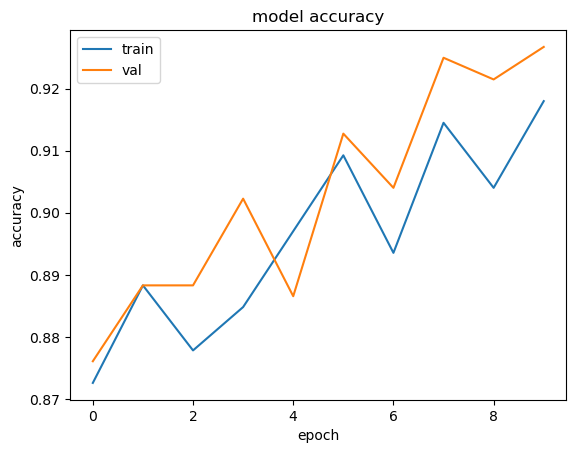

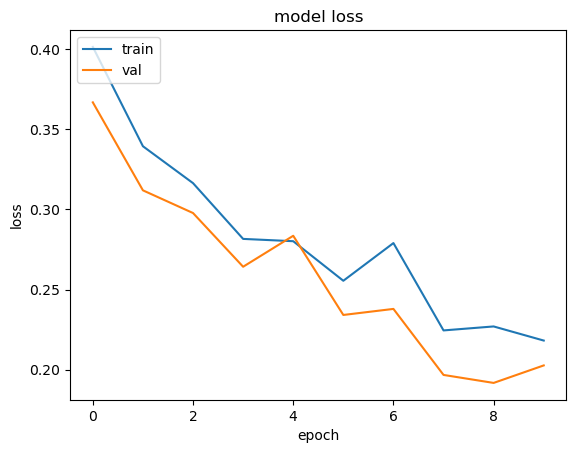

In [138]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()